In [ ]:
#In the name of God
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
first_name= "Navid"
last_name= "Farmahini Farahani"
student_number= "401210923"
Data=pd.read_csv("Heart_Disease_Dataset.csv")
magnitude_of_Data=Data.shape[0]*Data.shape[1]

print("Magnitude of data is: "+str(magnitude_of_Data)+" or "+str(Data.shape[0])+"*"+str(Data.shape[1]))


Magnitude of data is: 14280 or 1190*12


In [ ]:
num_missing_info=len(np.where(Data.isna()==True)[0])

print("Number of missing information is: "+str(num_missing_info))


Number of missing information is: 0


In [ ]:


class_0=np.where(Data['target']==0)
num_0=np.shape(class_0)[1]

class_1=np.where(Data['target']==1)
num_1=np.shape(class_1)[1]

print("Number of elements in Class 0: "+str(num_0)+"\nNumber of elements in Class 1: "+str(num_1)+"\nMean is: "+str((num_0+num_1)/2)+"\nDifference is: "+str(num_1-num_0)+"\nSo the class is balance")
means_class_0=np.zeros(np.shape(Data)[1]-1)
stds_class_0=np.zeros(np.shape(Data)[1]-1)
means_class_1=np.zeros(np.shape(Data)[1]-1)
stds_class_1=np.zeros(np.shape(Data)[1]-1)
for i in range(Data.shape[1]-1):
    s_1=[]
    s_0=[]
    for j in range(Data.shape[0]):
        if (np.array(Data)[j,-1]==1):
            s_1.append(np.array(Data)[j,i])
        else:
            s_0.append(np.array(Data)[j,i])

    means_class_0[i]=np.mean(np.array(s_0))
    means_class_1[i]=np.mean(np.array(s_1))
    stds_class_0[i]=np.std(np.array(s_0))
    stds_class_1[i]=np.std(np.array(s_1))

print("Mean of Class 0 are:"+str(means_class_0))
print("Mean of Class 1 are:"+str(means_class_1))
print("Standard Deviation of Class 0 are:"+str(stds_class_0))
print("Standard Deviation of Class 1 are:"+str(stds_class_1))

print("Mean Absolute Error between means are:"+str(abs(means_class_0-means_class_1)/means_class_0))
print("Mean Absolute Error between stds are:"+str(abs(stds_class_0-stds_class_1)/stds_class_0))

print("\n\n---So according to the MAE, classes are balance and have a suitable distribution")


Number of elements in Class 0: 561
Number of elements in Class 1: 629
Mean is: 595.0
Difference is: 68
So the class is balance
Mean of Class 0 are:[5.11247772e+01 6.23885918e-01 2.77718360e+00 1.29793226e+02
 2.31657754e+02 1.19429590e-01 6.31016043e-01 1.50894831e+02
 1.39037433e-01 4.64705882e-01 1.29768271e+00]
Mean of Class 1 are:[ 56.03497615   0.88871224   3.6391097  134.25914149 191.37201908
   0.2972973    0.75834658 129.77742448   0.60890302   1.33131955
   1.91573927]
Standard Deviation of Class 0 are:[ 9.48544862  0.48440921  0.90861195 16.47577026 69.95922276  0.32429333
  0.8679481  22.68472575  0.34598559  0.73258896  0.53618941]
Standard Deviation of Class 1 are:[  8.59837217   0.31448814   0.753453    19.65468022 119.63939557
   0.4570685    0.86741826  23.69965887   0.48799604   1.18240479
   0.51762909]
Mean Absolute Error between means are:[0.09604343 0.42447876 0.31035978 0.03440792 0.17390195 1.48931021
 0.20178653 0.13994784 3.37941788 1.86486486 0.4762771 ]
Mean 

Text(0.5, 1.0, 'Sexes of Class 1')

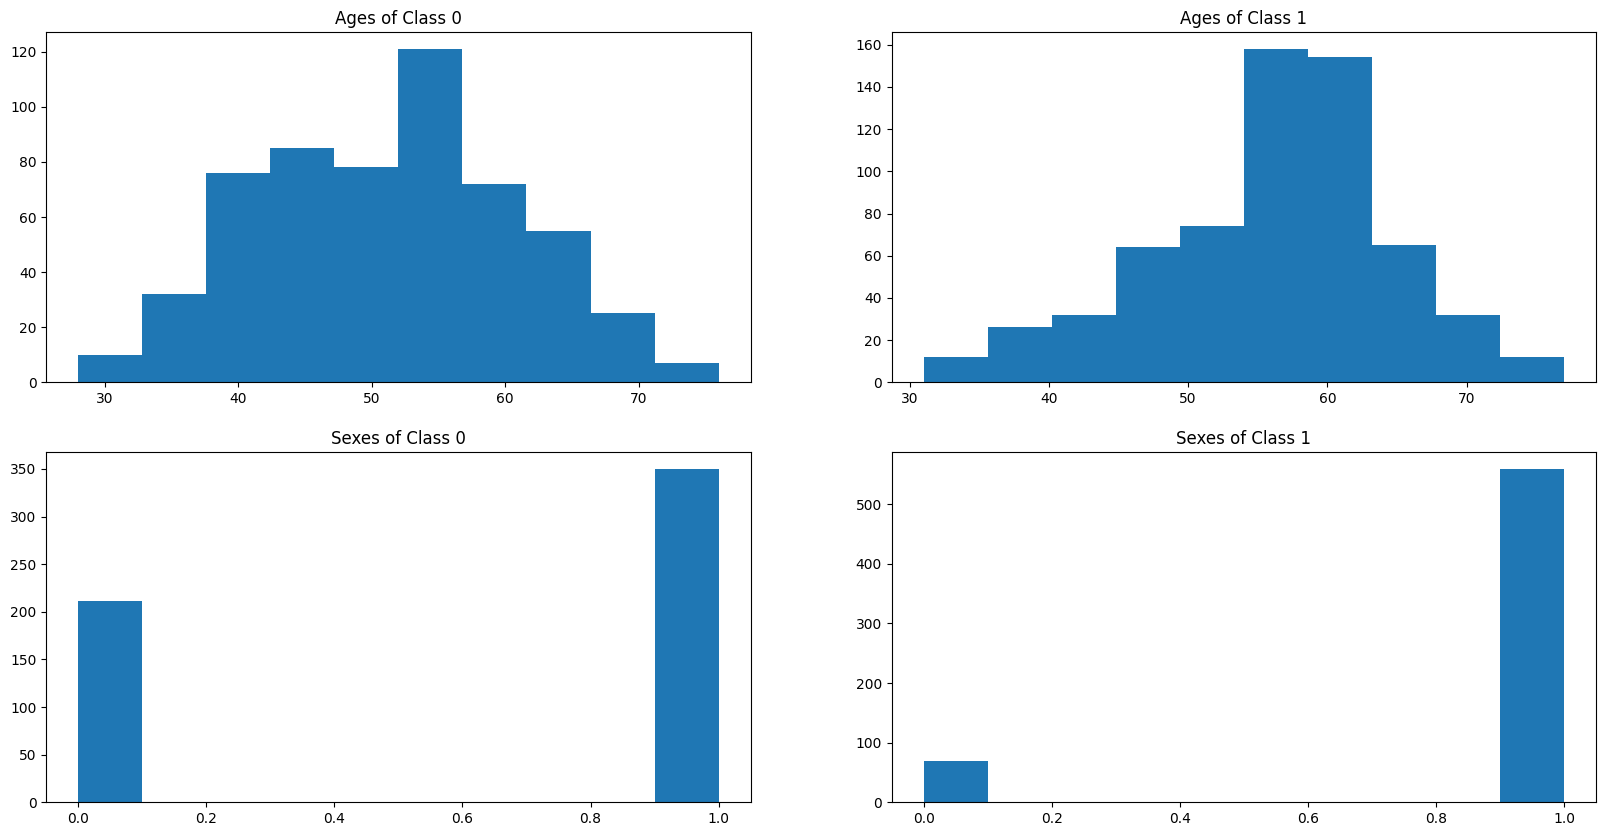

In [ ]:
#Age
Data_numpy=np.array(Data)
elements_of_class_0=np.reshape(Data_numpy[class_0,:],(num_0,12))
elements_of_class_0[:,-1]

elements_of_class_1=np.reshape(Data_numpy[class_1,:],(num_1,12))
elements_of_class_1[:,-1]

ages_class_0=np.array(elements_of_class_0[:,0])


ages_class_1=np.array(elements_of_class_1[:,0])


sexes_class_0=np.array(elements_of_class_0[:,1])


sexes_class_1=np.array(elements_of_class_1[:,1])

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(ages_class_0)
plt.title("Ages of Class 0")

plt.subplot(2,2,2)
plt.hist(ages_class_1)
plt.title("Ages of Class 1")

plt.subplot(2,2,3)
plt.hist(sexes_class_0)
plt.title("Sexes of Class 0")

plt.subplot(2,2,4)
plt.hist(sexes_class_1)
plt.title("Sexes of Class 1")

In [ ]:
all_Data=np.zeros((Data.shape[0],12))

for index_data in range(Data_numpy.shape[1]):
    Data_Column=Data_numpy[:,index_data]
    mean=np.mean(Data_Column)
    std=np.std(Data_Column)
    Z_data_Column=(Data_Column-mean)/std
    Data_Column_reduced=np.zeros(Z_data_Column.shape[0])
    index_reduced=[]
    for i in range(Data.shape[0]):
        if(Z_data_Column[i]<=3 and Z_data_Column[i]>=-3):
            Data_Column_reduced[i]=Data_Column[i]
        else:
            Data_Column_reduced[i]=np.nan
    all_Data[:np.shape(Data_Column_reduced)[0],index_data]=Data_Column_reduced

indexes_outlier=np.where(np.isnan(all_Data)==True)
outlier_data=Data_numpy[indexes_outlier]

print("Outlier data are:"+str(outlier_data))

# We ignore rows that contain np.nan values by the follow code:

all_Data_reduced=[]
for i in range(Data.shape[0]):
    if i not in indexes_outlier[0]:
        all_Data_reduced.append(all_Data[i])
all_Data_reduced=np.array(all_Data_reduced)
print("Final size of nonoutlier data is: "+str(all_Data_reduced.shape[0]*all_Data_reduced.shape[1])+" or "+str(all_Data_reduced.shape[0])+"*"+str(all_Data_reduced.shape[1]))


for index_data in ([0,3,4,7,9]):
    all_Data_reduced[:,index_data]=all_Data_reduced[:,index_data]/np.max(all_Data_reduced[:,index_data])


Outlier data are:[518.  529.  190.  603.    5.  200.   -2.6 200.   63.   60.  200.    0.
 190.  564.    4.2 200.  192.    5.6   4.2   6.2   6.2   5.6 200.  564.
   4.2 192.    4.2   4.4]
Final size of nonoutlier data is: 13944 or 1162*12


In [ ]:


from torch.utils.data import random_split
# We use torch library to determine train and test set by using random_split

train_percent=0.7
test_percent=1-train_percent
train_dataset,test_dataset=random_split(all_Data_reduced,[int(train_percent*all_Data_reduced.shape[0]),1+int(test_percent*all_Data_reduced.shape[0])])

x_train=np.array(train_dataset)[:,:11]
y_train=np.array(train_dataset)[:,-1]
x_test=np.array(test_dataset)[:,:11]
y_test=np.array(test_dataset)[:,-1]

###################### linear kernel
import numpy as np

# we use SVM function. In this function, if a data is missclassified, we update the w to get nearer to it
# Otherwise, we do nothing for updating weights and biases.
def svm(lr, num_ite, X_train, y_train, X_test):
    w=np.zeros(X_train.shape[1])
    b=0
    for iteration in range(num_ite):
        for index in range(X_train.shape[0]):
            missclassified_data_flag = y_train[index]*(np.dot(X_train[index,:],w)-b)
            if missclassified_data_flag<=1:
                w=w-lr*(-np.dot(X_train[index,:],y_train[index]))
                b=b-lr*y_train[index]
    flag=np.dot(X_test,w)-b
    y_pred=np.sign(flag)
    return y_pred


lr=1e-4
num_ite=2000

y_train2=y_train*2-1# labels are 0 and 1, we should map them to 1 and -1
y_pred=svm(lr=lr,num_ite=num_ite,X_train=x_train,y_train=y_train2,X_test=x_test)



y_test2=2*y_test-1# labels are 0 and 1, we should map them to 1 and -1
print("Accuracy Is: " +str(sum(y_pred==y_test2)/len(y_test2)))

TP=0
TN=0
FP=0
FN=0
for i in range(len(y_test2)):
    if y_test2[i]==1 and y_pred[i]==1:
        TP=TP+1
    if y_test2[i]==1 and y_pred[i]==-1:
        FN=FN+1
    if y_test2[i]==-1 and y_pred[i]==1:
        FP=FP+1
    if y_test2[i]==-1 and y_pred[i]==-1:
        TN=TN+1

Acc=(TP+TN)/(TN+TP+FP+FN)
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
F1_score=2*(Precision*Recall)/(Precision+Recall)
print("Parameters:\nAccuracy: " +str(Acc)+"\nPrecision: "+str(Precision)+"\nRecall: "+str(Recall)+"\nF1score: "+str(F1_score))

print("\n\n-- Note that we used random_split, so every time, the answer may become different a little.")
#Accuracy is 80.5157%

Accuracy Is: 0.8538681948424068
Parameters:
Accuracy: 0.8538681948424068
Precision: 0.8907103825136612
Recall: 0.8402061855670103
F1score: 0.8647214854111406


-- Note that we used random_split, so every time, the answer may become different a little.


In [ ]:
###################### RBF kernel
#We consider RBF_features. Then we use this function to produce more features from x_train and x_test

def RBF_features(data,gamma):
    expanded_data=data
    for_range=[0,3,4,7,9]
    for i in (for_range):
        for j in (for_range):
            the_feature=np.exp(-gamma*(data[:,i]-data[:,j])**2)
            the_feature=np.reshape(the_feature,(data.shape[0],1))
            expanded_data=np.concatenate((expanded_data,the_feature),1)

    return expanded_data
gamma=1
x_train2=RBF_features(x_train,gamma=gamma)
x_test2=RBF_features(x_test,gamma=gamma)
print(x_train2.shape)

y_train2=y_train*2-1# labels are 0 and 1, we should map them to 1 and -1
y_pred=svm(lr=lr,num_ite=num_ite,X_train=x_train2,y_train=y_train2,X_test=x_test2)


y_test2=2*y_test-1# labels are 0 and 1, we should map them to 1 and -1
print("Accuracy Is: " +str(sum(y_pred==y_test2)/len(y_test2)))
print("Gamma is: "+str(gamma))

TP=0
TN=0
FP=0
FN=0
for i in range(len(y_test2)):
    if y_test2[i]==1 and y_pred[i]==1:
        TP=TP+1
    if y_test2[i]==1 and y_pred[i]==-1:
        FN=FN+1
    if y_test2[i]==-1 and y_pred[i]==1:
        FP=FP+1
    if y_test2[i]==-1 and y_pred[i]==-1:
        TN=TN+1

Acc=(TP+TN)/(TN+TP+FP+FN)
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
F1_score=2*(Precision*Recall)/(Precision+Recall)
print("Parameters:\nAccuracy: " +str(Acc)+"\nPrecision: "+str(Precision)+"\nRecall: "+str(Recall)+"\nF1score: "+str(F1_score))

print("\n\n-- Note that we used random_split, so every time, the answer may become different a little.")
#Accuracy is 84.5272206303725%(for gamma=1)
#Accuracy is 83.95415472779369(for gamma=0.01)
#Accuracy is 83.95415472779369(for gamma=0.01)

(813, 36)
Accuracy Is: 0.8710601719197708
Gamma is: 1
Parameters:
Accuracy: 0.8710601719197708
Precision: 0.8983957219251337
Recall: 0.865979381443299
F1score: 0.8818897637795275


-- Note that we used random_split, so every time, the answer may become different a little.


In [ ]:
###################### polynomial kernel
#We consider polynomial_features. Then we use this function to produce more features from x_train and x_test
# Note that we multiplied all the numerial features together. We could determine every possible multiplication
# among all data ( so we had 11^d features that are very huge)
def polynomial_features(data,d):
    expanded_data=data
    for_range=[0,3,4,7,9]
    if (d==4):
        for l in (for_range):
            for k in (for_range):
                for i in (for_range):
                    for j in (for_range):
                        the_feature=np.reshape(data[:,i]*data[:,j]*data[:,k]*data[:,l],(data.shape[0],1))
                        expanded_data=np.concatenate((expanded_data,the_feature),1)

    elif(d==3):
        for k in (for_range):
            for i in (for_range):
                for j in (for_range):
                    the_feature=np.reshape(data[:,i]*data[:,j]*data[:,k],(data.shape[0],1))
                    expanded_data=np.concatenate((expanded_data,the_feature),1)

    else:
        for i in (for_range):
            for j in (for_range):
                the_feature=np.reshape(data[:,i]*data[:,j],(data.shape[0],1))
                expanded_data=np.concatenate((expanded_data,the_feature),1)

    return expanded_data
d=4
lr=1e-4
num_ite=2000

x_train2=polynomial_features(x_train,d=d)
x_test2=polynomial_features(x_test,d=d)
print(x_train2.shape)

y_train2=y_train*2-1# labels are 0 and 1, we should map them to 1 and -1
y_pred=svm(lr=lr,num_ite=num_ite,X_train=x_train2,y_train=y_train2,X_test=x_test2)

y_test2=2*y_test-1# labels are 0 and 1, we should map them to 1 and -1
print("Accuracy Is: " +str(sum(y_pred==y_test2)/len(y_test2)))
print("Degree of polynomial kernel is: "+str(d))

TP=0
TN=0
FP=0
FN=0
for i in range(len(y_test2)):
    if y_test2[i]==1 and y_pred[i]==1:
        TP=TP+1
    if y_test2[i]==1 and y_pred[i]==-1:
        FN=FN+1
    if y_test2[i]==-1 and y_pred[i]==1:
        FP=FP+1
    if y_test2[i]==-1 and y_pred[i]==-1:
        TN=TN+1

Acc=(TP+TN)/(TN+TP+FP+FN)
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
F1_score=2*(Precision*Recall)/(Precision+Recall)
print("Parameters:\nAccuracy: " +str(Acc)+"\nPrecision: "+str(Precision)+"\nRecall: "+str(Recall)+"\nF1score: "+str(F1_score))

print("\n\n-- Note that we used random_split, so every time, the answer may become different a little.")
#Accuracy is 85.67335243553008% d=4
#Accuracy is 84.81375358166189% d=3
#Accuracy is 83.3810888252149% d=2


(813, 636)
Accuracy Is: 0.8681948424068768
Degree of polynomial kernel is: 4
Parameters:
Accuracy: 0.8681948424068768
Precision: 0.8894736842105263
Recall: 0.8711340206185567
F1score: 0.8802083333333335


-- Note that we used random_split, so every time, the answer may become different a little.
